In [296]:
import pandas as pd
import numpy as np
import datetime
import pytz
from importlib import reload
import darwin
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
from metpy.calc import relative_humidity_from_mixing_ratio
warnings.filterwarnings('ignore')

In [335]:
station = 'crocker'
instrument = 'PCP_diff_radar'
experiment = 'MM'
var = 'prcp'
aggregation = 'd'
start = "2022-01-01"
end = "2022-12-30"

In [339]:
reload(darwin)
folder = "/home/ben/data/darwin_measured/"
garpath = Path('/home/ben/data/GAR/')
stations = {
    "Santa Rosa": "09_AWS-PSantaRosa_data.csv",
    "Cerro Crocker": "11_AWS-PCerroCrocker_data.csv",
    "Sierra Negra": "14_AWS-PSierraNegra_data.csv",
    "Cueva de Sucre": "16_AWS-PCuevadeSucre_data.csv",
    "La Galapaguera": "18_AWS-PLaGalapaguera_data.csv",
    "El Junco": "20_AWS-PElJunco_data.csv",
    "Puerto Baquerizo Moreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    "Puerto Villamil": "24_AWS-PPuertoVillamil_data.csv",
    "Puerto Ayora": "26_AWS-PPuertoAyora_data.csv",
    "Military": "28_AWS-PMilitar_data.csv",
    "Minas Rojas": "30_AWS-PMinasRojas_data.csv",
}
stations_trans = {
    "crocker": "Cerro Crocker",
    "puertovillamil": "Puerto Villamil",
}
datasets = {}
paths = {
    'MM': f'rc_trop_ls_MM_stations_{aggregation}_2d_{var}_2022.csv',
    'MM t2': f'rc_trop_ls_MM_stations_{aggregation}_2d_t2_2022.csv',
    'MM q2': f'rc_trop_ls_MM_stations_{aggregation}_2d_q2_2022.csv',
    'MM rh': f'rc_trop_ls_MM_stations_{aggregation}_2d_rh_2022.csv',
}

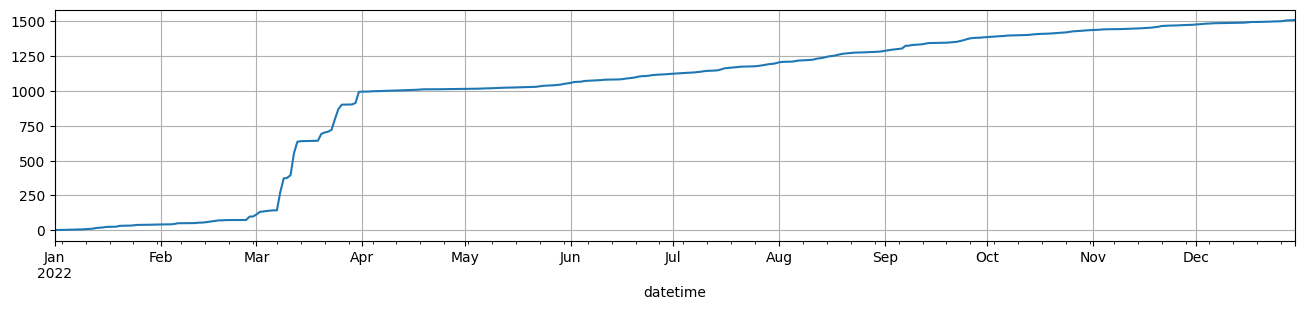

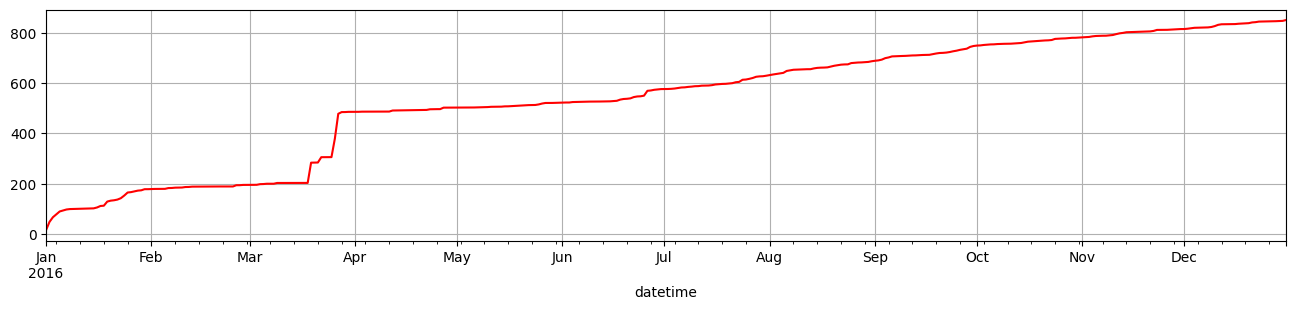

In [347]:
wrf = pd.read_csv(f"/home/ben/projects/darwin/{paths[experiment]}")
wrf.index = pd.DatetimeIndex(wrf["datetime"], tz=datetime.timezone.utc)
wrf.drop("datetime", axis=1, inplace=True)
wrf = wrf.loc[start:end] * 24

wrf2 = pd.read_csv(f"/home/ben/projects/darwin/rc_trop_ls_MM_stations_{aggregation}_2d_{var}_2016.csv")
wrf2.index = pd.DatetimeIndex(wrf2["datetime"], tz=datetime.timezone.utc)
wrf2.drop("datetime", axis=1, inplace=True)
wrf2 = wrf2 * 24

fig, ax = plt.subplots(figsize=(16, 3), sharex=True, sharey=True, )
wrf[station].cumsum().plot(ax=ax, label=experiment)
plt.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 3), sharex=True, sharey=True, )
wrf2[station].cumsum().plot(ax=ax, label=experiment, color='red')
plt.grid()
plt.show()

In [342]:
wrf2

,minasrojas,militar,puertoayora,puertovillamil,puertobaccerizomoreno,eljunco,lagalapaguera,cuevadesucre,negra,crocker,rosa
datetime,,,,,,,,,,,


In [305]:
wrf.loc['2022-09-15':'2022-10-04'] = np.nan
wrf.loc['2022-07-09':'2022-07-13'] = np.nan

measured = darwin.open_measurements(folder + stations[stations_trans[station]])
measured.loc['2022-09-16':'2022-10-04'] = np.nan
mf = measured.loc[start: end].resample("D").sum()
mf.loc['2022-09-15':'2022-10-04'] = np.nan
mf.loc['2022-07-09':'2022-07-13'] = np.nan


to_plot = pd.DataFrame({
    'MM': wrf[station], 
    'radar measurement': mf["PCP_diff_radar"],
    'bucket measurement': mf["PCP_tot_bucket"],
    # 'acoustic measurement': mf["PCP_acoustic"],
})
t2 = pd.read_csv(f"/home/ben/projects/darwin/{paths['MM t2']}")
t2.index = pd.DatetimeIndex(t2["datetime"], tz=datetime.timezone.utc)
t2.drop("datetime", axis=1, inplace=True)
t2 = pd.DataFrame({
    'MM': t2[station] - 273.15, 
    'measurement': measured.loc[start:end].resample('D').mean()['T'],
})[start:end]
t2.loc['2022-09-15':'2022-10-04'] = np.nan
t2.loc['2022-07-09':'2022-07-13'] = np.nan


q2 = pd.read_csv(f"/home/ben/projects/darwin/{paths['MM q2']}")
q2.index = pd.DatetimeIndex(q2["datetime"], tz=datetime.timezone.utc)
q2.drop("datetime", axis=1, inplace=True)
q2 = pd.DataFrame({
    'MM': q2[station], 
    'measurement': measured.loc[start:end].resample('D').mean()['RH'],
})[start:end]
q2.loc['2022-09-15':'2022-10-04'] = np.nan
q2.loc['2022-07-09':'2022-07-13'] = np.nan

rh = pd.read_csv(f"/home/ben/projects/darwin/{paths['MM rh']}")
rh.index = pd.DatetimeIndex(rh["datetime"], tz=datetime.timezone.utc)
rh.drop("datetime", axis=1, inplace=True)
rh = pd.DataFrame({
    'MM': rh[station], 
    'measurement': measured.loc[start:end].resample('D').mean()['RH'],
})[start:end]
rh.loc['2022-09-15':'2022-10-04'] = np.nan
rh.loc['2022-07-09':'2022-07-13'] = np.nan

In [306]:
measured.head()

,datetime,T,RH,SLR,WS,WD,PCP_tot_bucket,PCP_diff_radar,PCP_acoustic,FOG,ST,Vwc
datetime,,,,,,,,,,,,
2022-03-28 18:20:00+00:00,2022-03-28 12:20:00,21.85,99.1,690.7,4.624,69.39,0.0,0.0,NaN,0.0,28.29,0.581
2022-03-28 18:30:00+00:00,2022-03-28 12:30:00,21.88,99.2,561.9,3.308,80.40,0.0,0.0,NaN,0.0,28.44,0.581
2022-03-28 18:40:00+00:00,2022-03-28 12:40:00,22.31,97.7,577.9,4.313,71.32,0.0,0.0,NaN,0.0,28.55,0.581
2022-03-28 18:50:00+00:00,2022-03-28 12:50:00,22.29,97.3,628.8,4.460,84.60,0.0,0.0,NaN,0.0,28.74,0.580
2022-03-28 19:00:00+00:00,2022-03-28 13:00:00,22.07,97.3,372.2,3.556,88.00,0.0,0.0,NaN,0.0,28.77,0.580


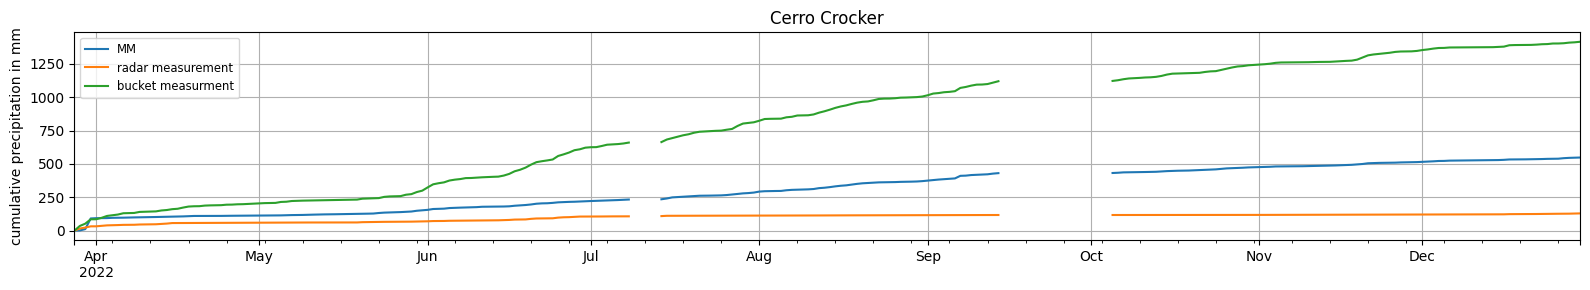

In [307]:
reload(darwin)

fig, ax = plt.subplots(figsize=(16, 3), sharex=True, sharey=True, )
wrf[station].cumsum().plot(ax=ax, label=experiment)
mf["PCP_diff_radar"].cumsum().plot(ax=ax, label="radar measurement")
mf["PCP_tot_bucket"].cumsum().plot(ax=ax, label="bucket measurment")
# mf["PCP_acoustic"].cumsum().plot(ax=ax, label="acoustic", style="--")
ax.set_title(stations_trans[station])
ax.set_xlabel("")
ax.set_ylabel("cumulative precipitation in mm")
plt.legend(fontsize='small')
plt.grid()
plt.tight_layout()
plt.savefig(f"comparison_prcp_crocker_cumsum.png")
plt.show()

In [314]:
reload(darwin)

to_boolean = to_plot.drop(to_plot.loc['2022-09-15':'2022-10-04'].index).drop(to_plot.loc['2022-07-09':'2022-07-13'].index)
to_boolean = to_boolean >= .1
hits = (to_boolean['MM'] == to_boolean['bucket measurement']).sum()
hits / len(to_boolean) * 100

95.65217391304348

In [315]:
to_boolean.describe()

,MM,radar measurement,bucket measurement
count,253,253,253
unique,2,2,2
top,True,False,True
freq,244,132,251


In [316]:
to_plot.corr(method='spearman')

,MM,radar measurement,bucket measurement
MM,1.000000,0.327486,0.703698
radar measurement,0.327486,1.000000,0.583339
bucket measurement,0.703698,0.583339,1.000000


In [319]:
((to_plot['MM'] - to_plot['bucket measurement']) ** 2).mean(skipna=True) ** .5

6.569308181954334

In [321]:
(to_plot['MM'] - to_plot['radar measurement']).mean()

1.6562188626719367

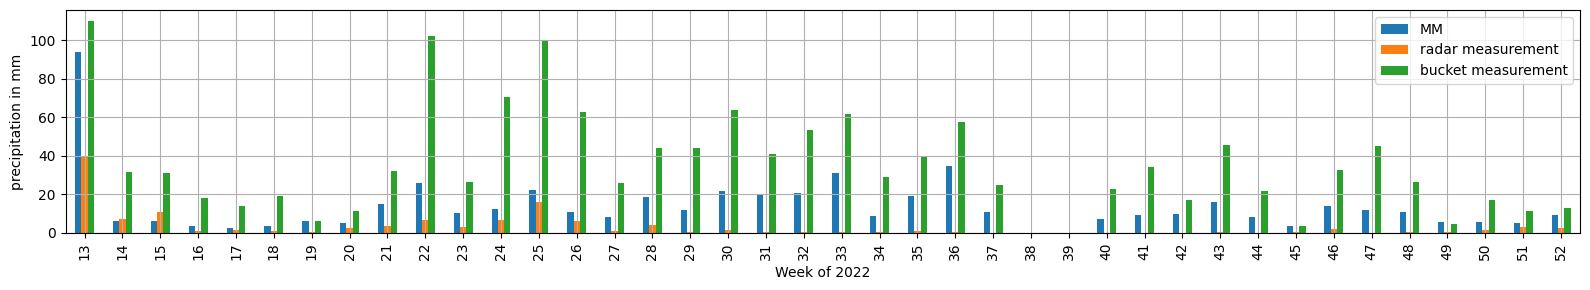

In [323]:
to_plot_weekly = to_plot.loc[start:end].resample("w").sum()
to_plot_weekly.index = pd.Index(np.arange(13,53))
fig, ax = plt.subplots(figsize=(16,3))
to_plot_weekly.plot(kind='bar', ax=ax, y=['MM', 'radar measurement', 'bucket measurement'])
# ax.set_title(stations_trans[station])
ax.set_xlabel("Week of 2022")
ax.set_ylabel("precipitation in mm")
plt.grid()
plt.tight_layout()
plt.savefig(f"comparison_prcp_crocker_weekly.png")
plt.show()

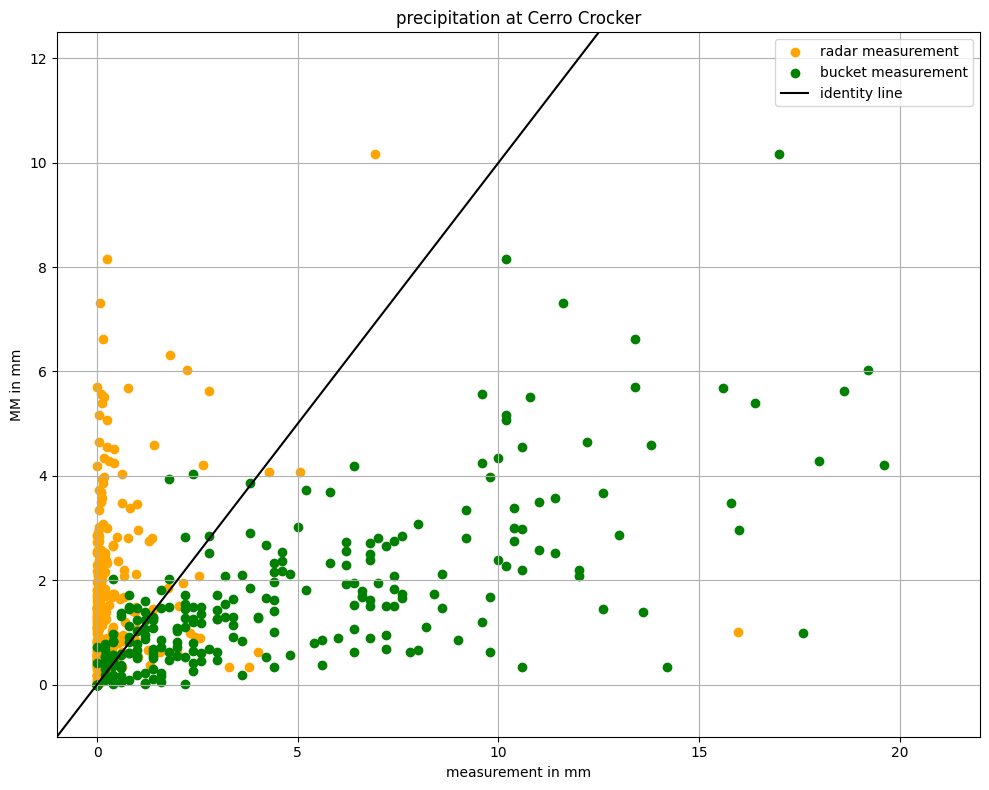

In [324]:
to_plot2 = to_plot.resample('D').sum()
reload(darwin)
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, )
ax.scatter(to_plot2['radar measurement'],to_plot2[experiment], label='radar measurement', color='orange')
ax.scatter(to_plot2['bucket measurement'],to_plot2[experiment], label='bucket measurement', color='green')
ax.set_title('precipitation at ' + stations_trans[station])
ax.set_ylabel("MM in mm")
ax.set_xlabel("measurement in mm")
ax.set_ylim([-1, 12.5])
ax.set_xlim([-1, 22])
x = np.arange(0, 100, 4)
m, c = 1, 0
y = (m * x) + c
plt.autoscale(False)
xlim = plt.gca().get_xlim()
plt.plot(xlim, xlim, label='identity line', color='k')
# ax.plot(x, y, linewidth=2,scalex=False, scaley=False)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f"{station}_prcp_regression.png")
plt.show()

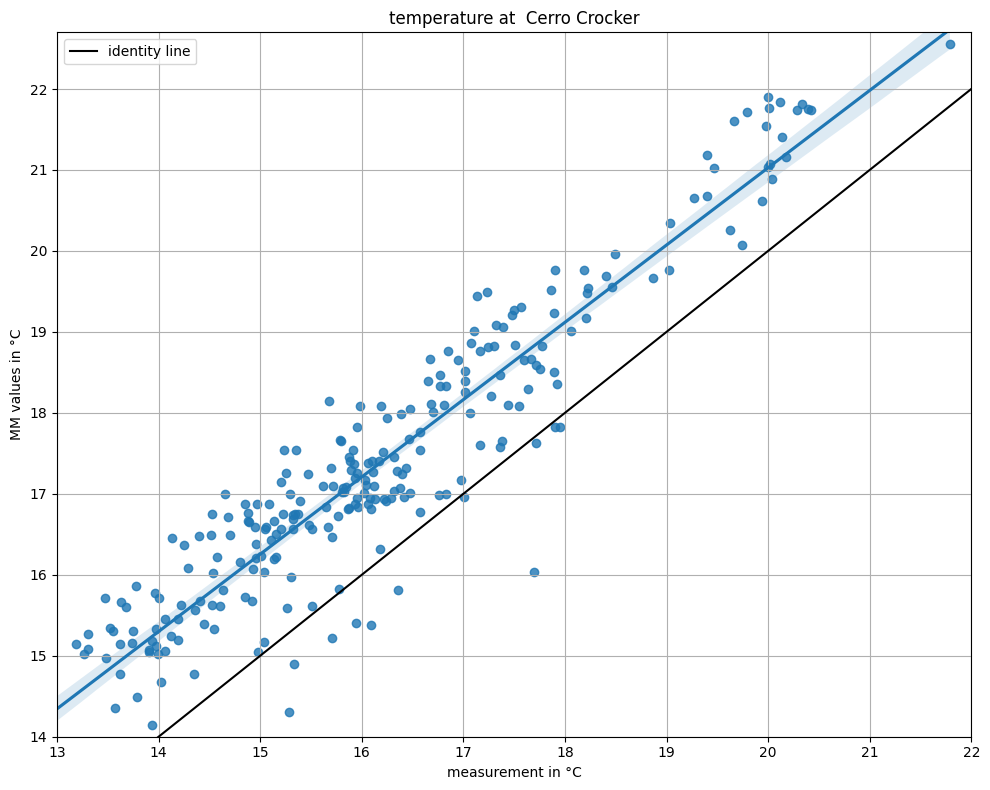

In [325]:
reload(darwin)
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, )
sns.regplot(t2, x='measurement',y='MM', fit_reg=True, ax=ax, )
ax.set_title('temperature at  ' + stations_trans[station])
ax.set_xlabel("measurement in °C")
ax.set_ylabel("MM values in °C")
ax.set_ylim([14, 22.7])
ax.set_xlim([13, 22])
x = np.arange(0, 100, 4)
m, c = 1, 0
y = (m * x) + c
plt.autoscale(False)
xlim = plt.gca().get_xlim()
plt.plot(xlim, xlim, label='identity line', color='k')
# ax.plot(x, y, linewidth=2,scalex=False, scaley=False)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f"{station}_t2_regression.png")
plt.show()

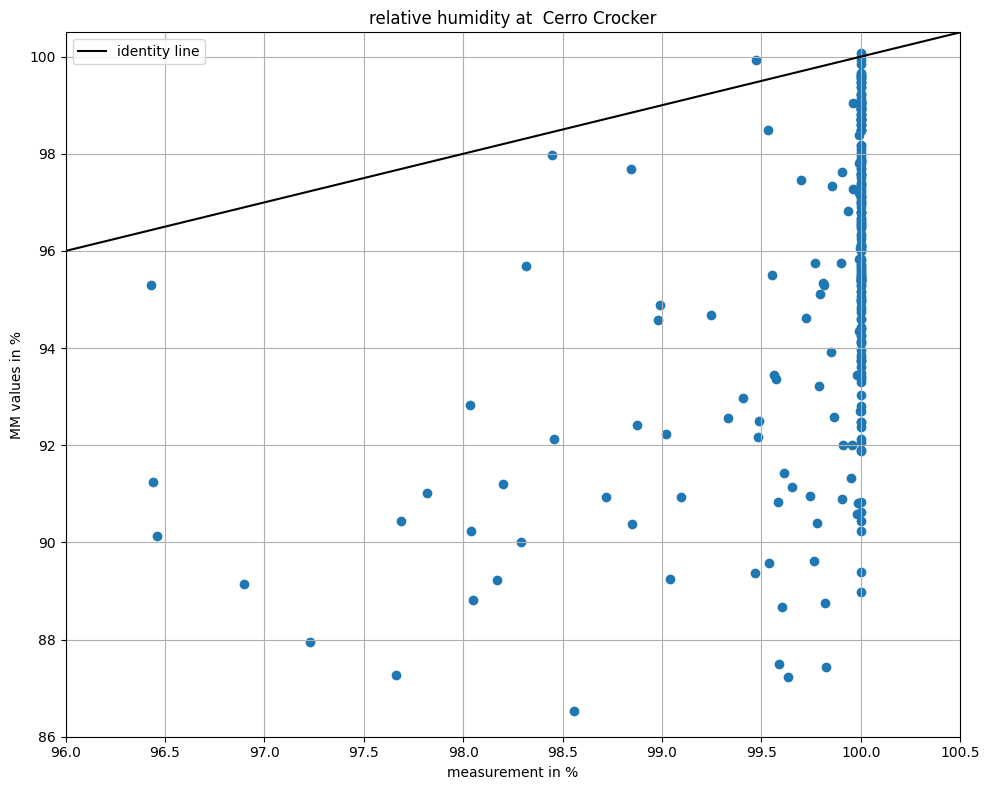

In [326]:
reload(darwin)
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, )
ax.scatter(x=rh['measurement'],y=rh['MM'])
ax.set_title('relative humidity at  ' + stations_trans[station])
ax.set_xlabel("measurement in %")
ax.set_ylabel("MM values in %")
ax.set_ylim([86, 100.5])
ax.set_xlim([96, 100.5])
x = np.arange(0, 100, 4)
m, c = 1, 0
y = (m * x) + c
plt.autoscale(False)
xlim = plt.gca().get_xlim()
plt.plot(xlim, xlim, label='identity line', color='k')
# ax.plot(x, y, linewidth=2,scalex=False, scaley=False)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f"{station}_rh_regression.png")
plt.show()

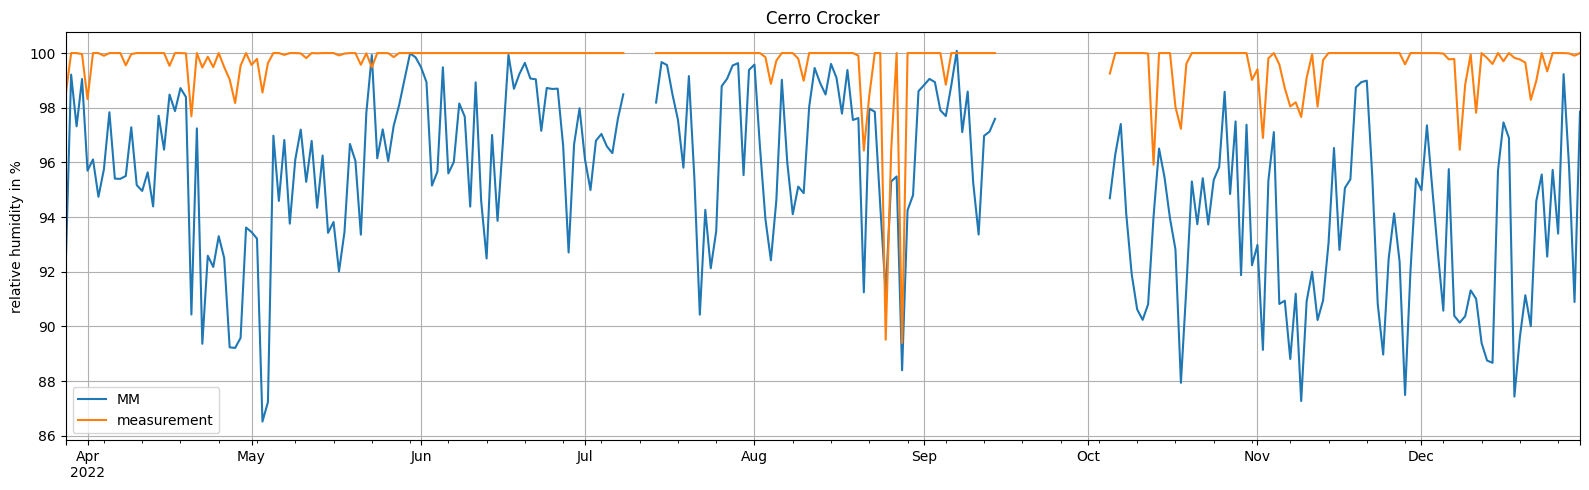

In [327]:
fig, ax = plt.subplots(figsize=(16, 5), sharex=True, sharey=True, )
rh.plot(ax=ax)
ax.set_title(stations_trans[station])
ax.set_xlabel("")
ax.set_ylabel("relative humidity in %")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f"comparison_rh_crocker_daily.png")
plt.show()

In [328]:
rh.corr(method='spearman')

,MM,measurement
MM,1.000000,0.534599
measurement,0.534599,1.000000


In [329]:
(rh['MM'] - rh['measurement']).mean()

-4.432746114260159

In [330]:
((rh['MM'] - rh['measurement']) ** 2).mean(skipna=True) ** .5

5.334706194464579

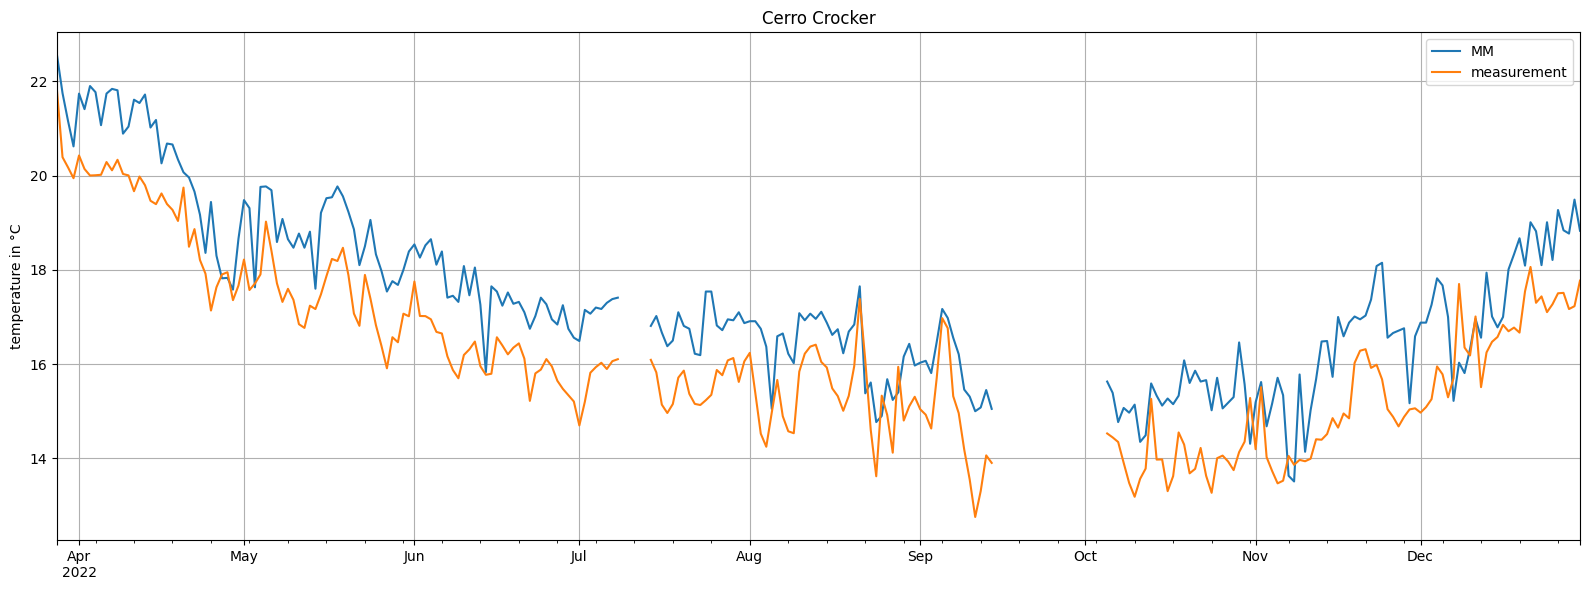

In [331]:
fig, ax = plt.subplots(figsize=(16, 6), sharex=True, sharey=True, )
t2.plot(ax=ax)
ax.set_title(stations_trans[station])
ax.set_xlabel("")
ax.set_ylabel("temperature in °C")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f"comparison_t2_crocker_daily.png")
plt.show()

In [332]:
t2.corr(method='pearson')

,MM,measurement
MM,1.000000,0.935836
measurement,0.935836,1.000000


In [333]:
((t2['MM'] - t2['measurement']) ** 2).mean(skipna=True) ** .5

1.3626493005070186

In [334]:
(t2['MM'] - t2['measurement']).mean()

1.2007774320242577